<a href="https://colab.research.google.com/github/ScenerYOne/Python/blob/main/fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms.bipartite import color

In [ ]:
dataset = pd.read_csv('/content/Credit_Card_Applications.csv')

In [ ]:
dataset.tail(20)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
670,15672357,0,37.75,5.500,2,11,4,0.125,1,0,0,1,2,228,1,1
671,15711759,1,22.67,2.540,1,8,8,2.585,1,0,0,0,2,0,1,1
672,15615296,0,17.92,10.210,2,1,1,0.000,0,0,0,0,2,0,51,0
673,15699294,1,24.42,12.335,2,11,8,1.585,1,0,0,1,2,120,1,1
674,15788634,0,25.75,0.500,2,8,8,0.875,1,0,0,1,2,491,1,1
675,15660871,1,26.17,12.500,1,4,8,1.250,0,0,0,1,2,0,18,0
676,15618258,0,22.75,6.165,2,6,4,0.165,0,0,0,0,2,220,1001,0
677,15722535,1,23.00,0.750,2,7,4,0.500,1,0,0,1,1,320,1,0
678,15711977,1,25.67,0.290,1,8,4,1.500,0,0,0,1,2,160,1,0
679,15690169,1,48.58,0.205,1,4,4,0.250,1,1,11,0,2,380,2733,1


In [ ]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [2]:
!pip install scikit-learn

In [3]:
!pip install minisom  # Install the minisom package

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=bd3e0eaad159f95a3b7fe4ad1453c8ffb703b6c6c20d08839cac259db2ec3992
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [69]:
from minisom import MiniSom
# สร้าง SOM และปรับพารามิเตอร์เพื่อเพิ่มการตรวจจับ Outliers
som = MiniSom(x=30, y=15, input_len=15, sigma=3.5, learning_rate=0.02)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=3000)


#find winner

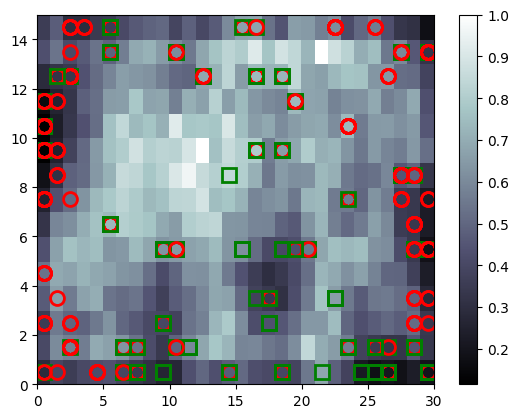

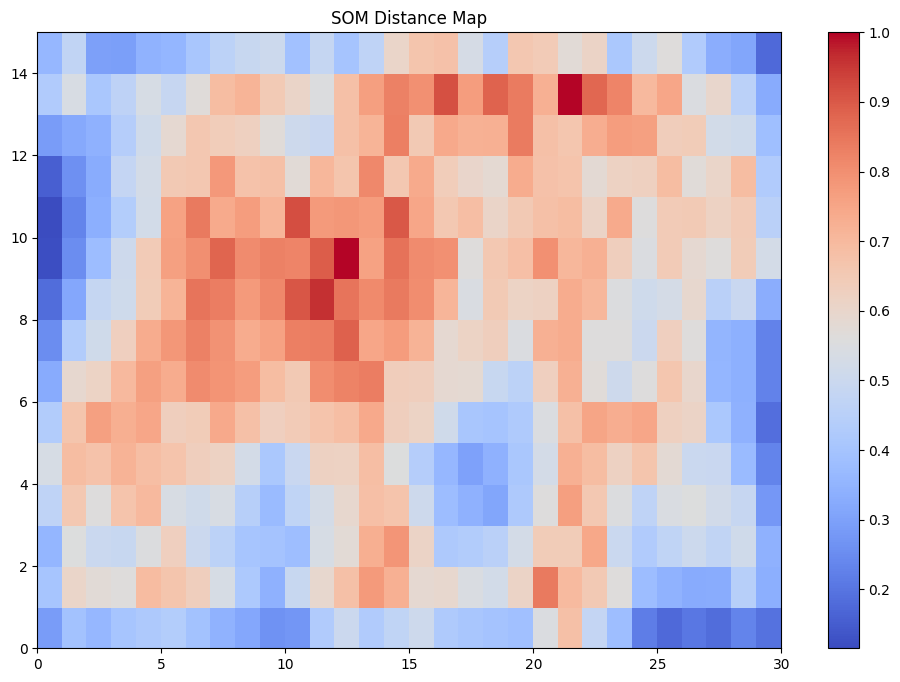

In [70]:
from pylab import bone, pcolor, colorbar, plot, show

# Visualizing the SOM
bone()
pcolor(som.distance_map().T)
colorbar()

# Define markers and colors
markers = ['o', 's']
colors = ['r', 'g']

# Loop through each input data point
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)

show()

# แสดงผลแผนที่ระยะห่าง (U-Matrix)
plt.figure(figsize=(12, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # ใช้สี coolwarm เพื่อเน้นเซลล์สีขาว
plt.colorbar()
plt.title('SOM Distance Map')
plt.show()

In [72]:
mappings = som.win_map(X)

# ตรวจสอบว่ามีข้อมูลในตำแหน่ง (0, 4) หรือไม่
if (0, 4) in mappings and len(mappings[(0, 4)]) > 0:
    # รวมข้อมูลในตำแหน่ง (0, 4)
    frauds = np.concatenate(mappings[(0, 4)], axis=0)  # ใช้ axis=0 หรือไม่ระบุ axis

    # ปรับให้ข้อมูลเป็นรูปแบบ 2D
    frauds = frauds.reshape(-1, X.shape[1])

    # แปลงข้อมูลกลับสู่ขนาดต้นฉบับ
    frauds = sc.inverse_transform(frauds)
    print(frauds)
else:
    print("ไม่มีข้อมูลในตำแหน่ง (0, 4) บนแผนที่ SOM")



[[1.5767264e+07 1.0000000e+00 7.4830000e+01 1.9000000e+01 1.0000000e+00
  1.0000000e+00 1.0000000e+00 4.0000000e-02 0.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 3.5200000e+02]
 [1.5761854e+07 1.0000000e+00 3.1250000e+01 2.8350000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  5.0000000e+00 0.0000000e+00 2.0000000e+00 1.7600000e+02 1.4700000e+02]
 [1.5815040e+07 1.0000000e+00 1.9000000e+01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  4.0000000e+00 0.0000000e+00 2.0000000e+00 4.5000000e+01 2.0000000e+00]
 [1.5801072e+07 1.0000000e+00 3.9580000e+01 5.0000000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 1.7000000e+01 2.0000000e+00]
 [1.5647295e+07 1.0000000e+00 6.9170000e+01 9.0000000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 4.0000000e+00 0.0000000e+00 1.

In [71]:
# สร้าง mappings ของแต่ละเซลล์ใน SOM
mappings = som.win_map(X)
outliers = []

# ตรวจจับ Outliers โดยหาค่าที่มีจำนวนข้อมูลเพียง 1 ค่าในเซลล์นั้น
for coord, values in mappings.items():
    if len(values) == 1:  # เซลล์ที่มีค่าเดียวถือว่าเป็น Outlier
        outliers.append(values[0])

# แปลง outliers จาก numpy array กลับเป็น DataFrame เพื่อตรวจสอบ CustomerID
outlier_indices = [i for i, x in enumerate(X) if any(np.all(x == outlier) for outlier in outliers)]  # Remove axis=1
outlier_ids = dataset.iloc[outlier_indices, 0].values  # ดึง CustomerID จาก index ที่เป็น outliers

# แสดงผล CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข
print("CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข:")
print(outlier_ids)

# สรุปจำนวน Outliers
num_outliers = len(outlier_ids)
print(f"จำนวน CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไขทั้งหมด: {num_outliers} คน")


CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไข:
[15815271 15704509 15654625 15591552 15583067 15605872 15636626 15790113]
จำนวน CustomerIDs ที่ได้รับบัตรเครติดโดยผิดเงื่อนไขทั้งหมด: 8 คน


In [73]:
import matplotlib.pyplot as plt
# ตรวจสอบตำแหน่งที่มีข้อมูลใน SOM
mappings = som.win_map(X)

# ตรวจสอบว่าข้อมูลในเซลล์ใดมีลักษณะผิดปกติ
for position, values in mappings.items():
    if len(values) == 1:  # ถ้าเซลล์นี้มีข้อมูลเพียงค่าเดียว (ถือว่าเป็น outlier)
        print(f"ตำแหน่ง {position}")
        print(f"มีข้อมูลผิดปกติ: {values}")


ตำแหน่ง (29, 2)
มีข้อมูลผิดปกติ: [array([9.99311253e-01, 1.00000000e+00, 2.07969925e-01, 1.16071429e-01,
       0.00000000e+00, 7.69230769e-01, 8.75000000e-01, 1.78421053e-01,
       0.00000000e+00, 1.00000000e+00, 2.98507463e-02, 1.00000000e+00,
       5.00000000e-01, 1.84500000e-01, 1.00000000e-05])]
ตำแหน่ง (2, 7)
มีข้อมูลผิดปกติ: [array([0.55578247, 1.        , 0.16285714, 0.48214286, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.5       , 0.092     , 0.        ])]
ตำแหน่ง (1, 3)
มีข้อมูลผิดปกติ: [array([3.56029936e-01, 0.00000000e+00, 5.95187970e-01, 5.89285714e-03,
       5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 3.10000000e-02, 2.70000000e-04])]
ตำแหน่ง (16, 3)
มีข้อมูลผิดปกติ: [array([0.10346416, 1.        , 0.32210526, 0.08928571, 0.5       ,
       0.23076923, 0.375     , 0.15789474, 1.        , 1